In [1]:
# importing packages and modules
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.optimize import minimize
from utils import *
from plotting_utils import *
from analysis_utils import *
import dglm_hmm1
from scipy.stats import multivariate_normal, norm
# import jax

# code from summer project working with PWM data
import sys, os
sys.path.append(os.path.abspath(os.path.join('..', '..', 'LC_PWM_GLM-HMM/code')))
import io_utils, analysis_utils, plotting_utils

In [2]:
# rat ids to look at first
animal_ids = ['W073','W075']

In [3]:
pni_path = '/Users/lencacuturela/Desktop/github/LC_PWM_GLM-HMM/data'

### Data Prep and CV

In [14]:
sigmaList = [0.008,0.04,0.09,0.2,0.45,1,2.23,5,11.18,25,125]
df = io_utils.load_and_wrangle(rat_id='W073', path=pni_path, psychometric=True, cutoff=10, overwrite=False, stage_filter=2)
print(len(df.index.tolist()))
x, y = io_utils.prepare_design_matrices(rat_id='W073', path=pni_path, psychometric=True, cutoff=10, stage_filter=2, overwrite=False)
sessInd = list(io_utils.session_start(rat_id='W073', path=pni_path, psychometric=True, cutoff=10, stage_filter=2))



146771


In [9]:
folds = 3
trainX, trainY, trainSessInd, testX, testY, testSessInd = split_data_per_session(x, y, sessInd, folds=3, random_state=1)

In [14]:
print(testX[2].shape)

(48717, 6)


### Fitting single sigma

In [27]:
N = x.shape[0]
C = 2 # classes
K = 2 # states
D = x.shape[1]
dGLM_HMM = dglm_hmm1.dGLM_HMM1(N,K,D,C)
initP, initW = dGLM_HMM.generate_param(sessInd=sessInd, transitionDistribution=['dirichlet', (5, 1)], weightDistribution=['uniform', (-2,2)]) # initialize the model parameters
checkP, checkW, checkLl = dGLM_HMM.fit(x, y,  initP, initW, sigma= reshapeSigma(0.1, K, D), sessInd=sessInd, pi0=None, maxIter=2, tol=1e-4) # fit the model
print(np.argmax(checkLl))

KeyboardInterrupt: 

In [5]:
for k in [1,2]:
    N = x.shape[0]
    C = 2 # classes
    K = k # states
    D = x.shape[1]
    dGLM_HMM = dglm_hmm1.dGLM_HMM1(N,K,D,C)
    initP, initW = dGLM_HMM.generate_param(sessInd=sessInd, transitionDistribution=['dirichlet', (5, 1)], weightDistribution=['uniform', (-2,2)]) # initialize the model parameters
    checkP, checkW, checkLl = dGLM_HMM.fit(x, y,  initP, initW, sigma= reshapeSigma(0.1, K, D), sessInd=sessInd, pi0=None, maxIter=250, tol=1e-3) # fit the model
    np.save(f'../data/P_{k}_state_PWM', checkP)
    np.save(f'../data/Ll_{k}_state_PWM', checkLl)
    np.save(f'../data/W_{k}_state_PWM', checkW)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
0
1


/Users/lencacuturela/Desktop/Research/github/Pillow_dGLM-HMM/code/dglm_hmm1.py:394: RuntimeWarning: divide by zero encountered in log
  logPhi = np.log(phi) # natural log of observation probabilities
/Users/lencacuturela/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/Users/lencacuturela/Desktop/Research/github/Pillow_dGLM-HMM/code/dglm_hmm1.py:394: RuntimeWarning: divide by zero encountered in log
  logPhi = np.log(phi) # natural log of observation probabilities


2


/Users/lencacuturela/Desktop/Research/github/Pillow_dGLM-HMM/code/dglm_hmm1.py:394: RuntimeWarning: divide by zero encountered in log
  logPhi = np.log(phi) # natural log of observation probabilities
/Users/lencacuturela/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/Users/lencacuturela/Desktop/Research/github/Pillow_dGLM-HMM/code/dglm_hmm1.py:394: RuntimeWarning: divide by zero encountered in log
  logPhi = np.log(phi) # natural log of observation probabilities


3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95


KeyboardInterrupt: 

In [6]:
np.save(f'../data/P_2_state_100iter_PWM', checkP)
np.save(f'../data/Ll_2_state_100iter_PWM', checkLl)
np.save(f'../data/W_2_state_100iter_PWM', checkW)

### Fitting multiple sigmas

In [4]:
sigmaList = [0, 0.01, 0.1, 1, 10, 100]
fit_eval_CV_multiple_sigmas_PWM(rat_id='W073', stage_filter=2, K=1, folds=3, sigmaList = sigmaList, maxiter=300, path=pni_path, save=True)

0
0.01
0.1
1
10
100
0
0.01
0.1
1
10
100
0
0.01
0.1
1
10
100


([array([[-175248.89967585,  -43269.85324824,  -43269.85322836, ...,
                0.        ,       0.        ,       0.        ],
         [ -43269.85322836,  -43251.93803994,  -43236.86209312, ...,
           -41416.48215203,  -41413.49962986,  -41410.52766849],
         [ -41407.56618436,  -40757.7040417 ,  -40432.01350667, ...,
                0.        ,       0.        ,       0.        ],
         [ -39204.89344302,  -37714.83272527,  -37705.15591108, ...,
                0.        ,       0.        ,       0.        ],
         [ -37703.63304962,  -37570.29096574,  -37570.11729953, ...,
                0.        ,       0.        ,       0.        ],
         [ -37570.10560494,  -37566.46861352,  -37566.46460462, ...,
                0.        ,       0.        ,       0.        ]]),
  array([[-159014.09052383,  -43562.4907602 ,  -43562.49072706, ...,
                0.        ,       0.        ,       0.        ],
         [ -43562.49071931,  -43544.54283835,  -43529.506056

In [ ]:
# CHECKING THAT SIGMA=0 GIVES CONSTANT WIEGHTS

(6, 97636, 1, 6, 2)


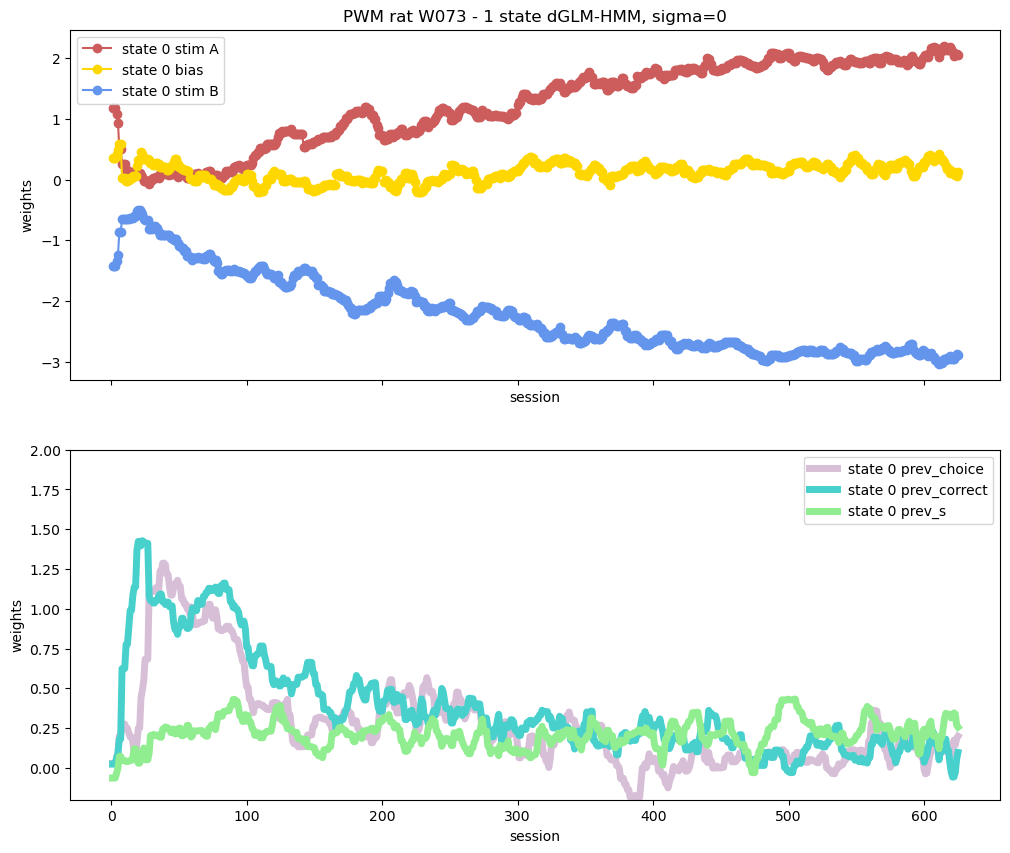

In [22]:
rat_id = 'W073'
stage_filter = 2
folds = 3
K = 1
sigmaList = [0, 0.01, 0.1, 1, 10, 100]
# PLOTTING WEIGHTS ACROSS MULTIPLE SIGMAS
for fold in range(0,1):
    trainSessInd = np.load(f'../data/trainSessInd_PWM_{rat_id}_sf={stage_filter}_{K}_state_fold-{fold}_multiple_sigmas.npy')
    testSessInd = np.load(f'../data/testSessInd_PWM_{rat_id}_sf={stage_filter}_{K}_state_fold-{fold}_multiple_sigmas.npy')
    allP = np.load(f'../data/P_PWM_{rat_id}_sf={stage_filter}_{K}_state_fold-{fold}_multiple_sigmas.npy')
    allW = np.load(f'../data/W_PWM_{rat_id}_sf={stage_filter}_{K}_state_fold-{fold}_multiple_sigmas.npy')
    print(allW.shape)
    for indSigma in range(0, 1):# len(sigmaList)):
        fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=False, figsize=(12,10))
        plotting_weights_PWM(w=allW[indSigma], sessInd=trainSessInd, axes=axes, title=f'PWM rat W073 - 1 state dGLM-HMM, sigma={sigmaList[indSigma]}')
        

In [ ]:
def sigma_CV_testLl_plot_PWM(rat_id, stage_filter, K, folds, sigmaList, axes, title='', label='', save_fig=False):
    ''' 
    function for plotting the test LL vs sigma scalars
    '''
    np.save(f'../data/trainLl_PWM_{rat_id}_sf={stage_filter}_{K}_state_fold-{fold}_multiple_sigmas', trainLl[fold])
    np.save(f'../data/testLl_PWM_{rat_id}_sf={stage_filter}_{K}_state_fold-{fold}_multiple_sigmas', testLl[fold])
            )
    
    colormap = sns.color_palette("viridis")
    for init in range(0,inits):
        axes.set_title(title)
        axes.scatter(np.log(sigmaList[1:]), testLl[init,1:], color=colormap[init])
        axes.plot(np.log(sigmaList[1:]), testLl[init,1:], color=colormap[init])
        if(sigmaList[0]==0):
            axes.scatter(-1 + np.log(sigmaList[1]), testLl[init,0], color=colormap[init], label=f'init {init}')
            axes.set_xticks([-1 + np.log(sigmaList[1])]+list(np.log(sigmaList[1:])),['GLM-HMM'] + [f'{np.round(sigma,3)}' for sigma in sigmaList[1:]])
        else:
            axes.scatter(np.log(sigmaList[0]), testLl[init,0], color=colormap[init], label=f'init {init}')
            axes.set_xticks([np.log(sigmaList)],[f'{np.round(sigma,2)}' for sigma in sigmaList])
        axes.set_ylabel("Test LL (per trial)")
        axes.set_xlabel("sigma")
        #axes.legend()

    if(save_fig==True):
        plt.savefig(f'../figures/Sigma_vs_TestLl-{title}', bbox_inches='tight', dpi=300)

### Verifying against PsyTrack

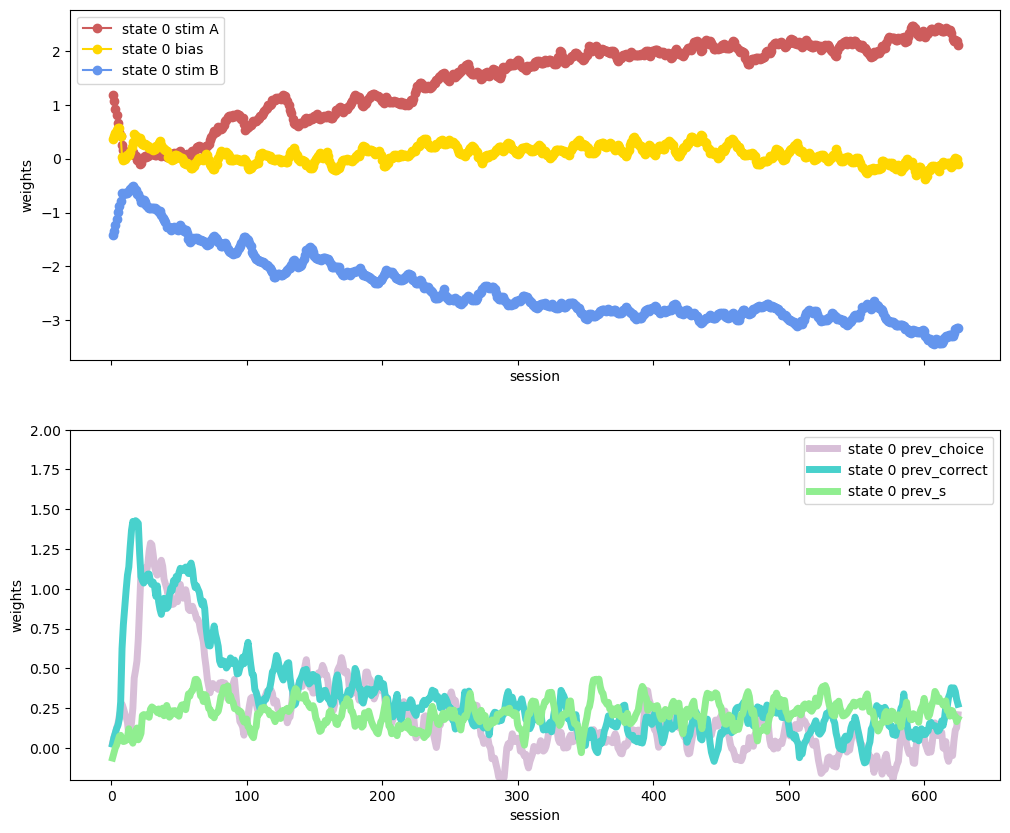

In [19]:
checkP = np.load(f'../data/P_1_state_PWM.npy')
checkLl = np.load(f'../data/Ll_1_state_PWM.npy')
checkW = np.load(f'../data/W_1_state_PWM.npy')

fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=False, figsize=(12,10))
def plotting_weights_PWM(w, sessInd, axes, title=''):
    K = w.shape[1]
    sess = len(sessInd)-1
    axes[0].plot(range(1,sess+1),checkW[sessInd[:-1],0,1,0],color='indianred',marker='o',label='state 0 stim A')
    axes[0].plot(range(1,sess+1),checkW[sessInd[:-1],0,0,0],color='gold',marker='o', label='state 0 bias')
    axes[0].plot(range(1,sess+1),checkW[sessInd[:-1],0,2,0],color='cornflowerblue',marker='o', label='state 0 stim B')

    axes[0].set_title(title)
    #plt.xticks(range(1,sess+1))
    axes[0].set_ylabel("weights")
    axes[0].set_xlabel('session')
    #plt.legend(fontsize='xx-small')

    axes[1].plot(range(1,sess+1),checkW[sessInd[:-1],0,4,0],color='thistle', linewidth=5, label='state 0 prev_choice')
    axes[1].plot(range(1,sess+1),checkW[sessInd[:-1],0,5,0],color='mediumturquoise',linewidth=5, label='state 0 prev_correct')
    axes[1].plot(range(1,sess+1),checkW[sessInd[:-1],0,3,0],color='lightgreen',linewidth=5, label='state 0 prev_s')

    axes[1].set_ylim(-0.2,2)
    #plt.xticks(range(1,sess+1))
    axes[1].set_ylabel("weights")
    axes[1].set_xlabel('session')

    if (K >= 2):
        axes[0].plot(range(1,sess+1),checkW[sessInd[:-1],1,1,0],color='darkred',marker='o',label='state 0 stim A')

    axes[0].legend()
    axes[1].legend()


plotting_weights_PWM(w=checkW, sessInd=sessInd, axes=axes)


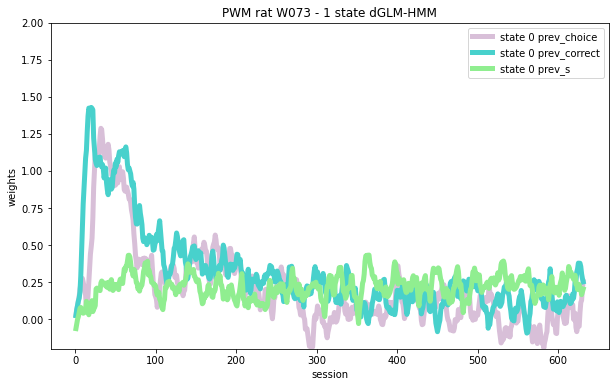

In [38]:
sess = len(sessInd)-1
plt.figure(figsize=(10,6))


plt.plot(range(1,sess+1),checkW[sessInd[:-1],0,4,0],color='thistle', linewidth=5, label='state 0 prev_choice')
plt.plot(range(1,sess+1),checkW[sessInd[:-1],0,5,0],color='mediumturquoise',linewidth=5, label='state 0 prev_correct')
plt.plot(range(1,sess+1),checkW[sessInd[:-1],0,3,0],color='lightgreen',linewidth=5, label='state 0 prev_s')

plt.ylim(-0.2,2)
plt.title('PWM rat W073 - 1 state dGLM-HMM')
#plt.xticks(range(1,sess+1))
plt.ylabel("weights")
plt.xlabel('session')
plt.legend()
#plt.legend(fontsize='xx-small')
plt.show()

### Verifying against GLM-HMM from Brody lab project

In [ ]:
x, y = io_utils.prepare_design_matrices(rat_id='W073', path=None, psychometric=True, cutoff=10, stage_filter=2, overwrite=False)
sessInd = list(io_utils.session_start(rat_id='W073', path=None, psychometric=True, cutoff=10, stage_filter=2))
N = x.shape[0]
C = 2 # classes
K = 1 # states
D = x.shape[1]
dGLM_HMM = dglm_hmm1.dGLM_HMM1(N,K,D,C)
initP, initW = dGLM_HMM.generate_param(sessInd=sessInd, transitionDistribution=['dirichlet', (5, 1)], weightDistribution=['uniform', (-2,2)]) # initialize the model parameters
checkP, checkW, checkLl = dGLM_HMM.fit(x, y,  initP, initW, sigma= reshapeSigma(0.1, K, D), sessInd=sessInd, pi0=None, maxIter=2, tol=1e-4) # fit the model
print(np.argmax(checkLl))

In [ ]:
x, y = io_utils.prepare_design_matrices(rat_id='W075', path=None, psychometric=True, cutoff=10, stage_filter=2, overwrite=False)
sessInd = list(io_utils.session_start(rat_id='W075', path=None, psychometric=True, cutoff=10, stage_filter=2))
N = x.shape[0]
C = 2 # classes
K = 2 # states
D = x.shape[1]
dGLM_HMM = dglm_hmm1.dGLM_HMM1(N,K,D,C)
initP, initW = dGLM_HMM.generate_param(sessInd=sessInd, transitionDistribution=['dirichlet', (5, 1)], weightDistribution=['uniform', (-2,2)]) # initialize the model parameters
checkP, checkW, checkLl = dGLM_HMM.fit(x, y,  initP, initW, sigma= reshapeSigma(0.1, K, D), sessInd=sessInd, pi0=None, maxIter=2, tol=1e-4) # fit the model
print(np.argmax(checkLl))